In [53]:
import tensorflow as tf
import pickle
from utils.ResidualAttentionNetwork import ResidualAttentionNetwork
from matplotlib import pyplot as plt

In [54]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True,
                                                          validation_split=0.2)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train - x_train.mean()
x_test = x_test - x_test.mean()

datagen.fit(x_train)

input_shape = x_train.shape[1:]
output_size = 10

In [56]:
"""
:dataset: Cifar10
:model Attention-56 with pre-activation Residual Unit, Attention Residual Learning
:param optimizer: Adam
:param batch_size = 64
:param epochs = 350
"""
model = ResidualAttentionNetwork(input_shape=input_shape, output_size=output_size).Attention_56()
model.compile(tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

callback_accuracy = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
                    epochs=200, callbacks=[callback_accuracy])

Epoch 1/200
625/625 [==============================] - 52s 66ms/step - loss: 1.8510 - accuracy: 0.3115 - val_loss: 2.1472 - val_accuracy: 0.3346
Epoch 2/200
625/625 [==============================] - 39s 63ms/step - loss: 1.5419 - accuracy: 0.4249 - val_loss: 1.7137 - val_accuracy: 0.3906
Epoch 3/200
625/625 [==============================] - 39s 62ms/step - loss: 1.4240 - accuracy: 0.4791 - val_loss: 1.5300 - val_accuracy: 0.4387
Epoch 4/200
625/625 [==============================] - 40s 63ms/step - loss: 1.3340 - accuracy: 0.5179 - val_loss: 1.4397 - val_accuracy: 0.4958
Epoch 5/200
625/625 [==============================] - 39s 63ms/step - loss: 1.3138 - accuracy: 0.5251 - val_loss: 4.3092 - val_accuracy: 0.1744
Epoch 6/200
625/625 [==============================] - 39s 62ms/step - loss: 1.4499 - accuracy: 0.4664 - val_loss: 1.4012 - val_accuracy: 0.4734
Epoch 7/200
625/625 [==============================] - 40s 63ms/step - loss: 1.2721 - accuracy: 0.5389 - val_loss: 1.3651 - val_ac

In [96]:
history6 = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
                     epochs=40, callbacks=[callback_accuracy])

Epoch 1/40
625/625 [==============================] - 39s 63ms/step - loss: 0.3037 - accuracy: 0.8952 - val_loss: 0.5884 - val_accuracy: 0.8080
Epoch 2/40
625/625 [==============================] - 39s 63ms/step - loss: 0.2999 - accuracy: 0.8952 - val_loss: 0.5997 - val_accuracy: 0.8159
Epoch 3/40
625/625 [==============================] - 39s 63ms/step - loss: 0.3057 - accuracy: 0.8942 - val_loss: 0.5140 - val_accuracy: 0.8323
Epoch 4/40
625/625 [==============================] - 39s 63ms/step - loss: 0.3025 - accuracy: 0.8952 - val_loss: 0.5231 - val_accuracy: 0.8323
Epoch 5/40
625/625 [==============================] - 39s 63ms/step - loss: 0.3094 - accuracy: 0.8939 - val_loss: 0.6155 - val_accuracy: 0.8089
Epoch 6/40
625/625 [==============================] - 39s 63ms/step - loss: 0.2989 - accuracy: 0.8966 - val_loss: 0.5042 - val_accuracy: 0.8395
Epoch 7/40
625/625 [==============================] - 39s 63ms/step - loss: 0.2986 - accuracy: 0.8968 - val_loss: 0.4790 - val_accuracy:

In [90]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.4711 - accuracy: 0.8581


[0.47110307216644287, 0.8580999970436096]

In [107]:
history_list = [history.history, history2.history, history3.history, history4.history, history6.history]
history_dict = {}
for k in history.history.keys():
  history_dict[k] = list(history_dict[k] for history_dict in history_list)

In [108]:
flatten = lambda t: [item for sublist in t for item in sublist]
accuracy = flatten(history_dict['accuracy'])
loss = flatten(history_dict['loss'])
val_accuracy = flatten(history_dict['val_accuracy'])
val_loss = flatten(history_dict['val_loss'])

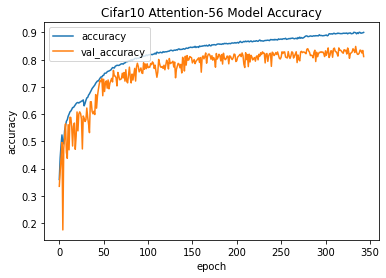

In [109]:
plt.plot(accuracy)
plt.plot(val_accuracy)

plt.title('Cifar10 Attention-56 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

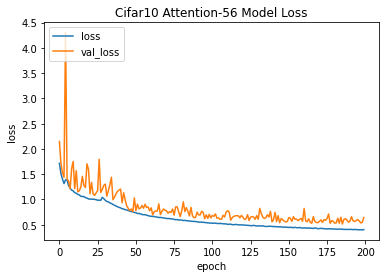

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Cifar10 Attention-56 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [99]:
model.save('cifar10_att56_adam_arl_resnet_350epoch_train.h5')